In [129]:
import awkward as ak
import pet_helpers as p
p.hello()

Hello World


In [130]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# The following command display the current working directory (where jupyter has been launched)
# and select the output folder
cwd = os.getcwd()
folder = Path(cwd) / 'output'
if (not folder.is_dir()):
    print(f'ERROR: {folder} is not a folder.')
print(f'The Current Working Directory (CWD) is {cwd}')
print(f'The output folder is {folder}')

The Current Working Directory (CWD) is /Users/baronli/PycharmProjects/GateSoftwareProject/gate_exercices_2/7_pet
The output folder is /Users/baronli/PycharmProjects/GateSoftwareProject/gate_exercices_2/7_pet/output


In [131]:
# opening the files
import uproot
filename = os.path.join(folder, "output_simple_hot_sphere.root")
f = uproot.open(filename)

# print the list of trees
for t in f:
    print(f'Tree {t}')

# get the first tree and print the branches
hits = f['Hits']
print()
print(f'Number of hits : {hits.num_entries}')
for b in hits:
    print(f'Branch {b.name}')

Tree Hits;1
Tree Singles1;1
Tree Singles2;1
Tree Singles3;1
Tree Singles4;1
Tree Singles5;1

Number of hits : 9314203.0
Branch PostPosition_X
Branch PostPosition_Y
Branch PostPosition_Z
Branch TotalEnergyDeposit
Branch PreStepUniqueVolumeID
Branch GlobalTime
Branch LocalTime


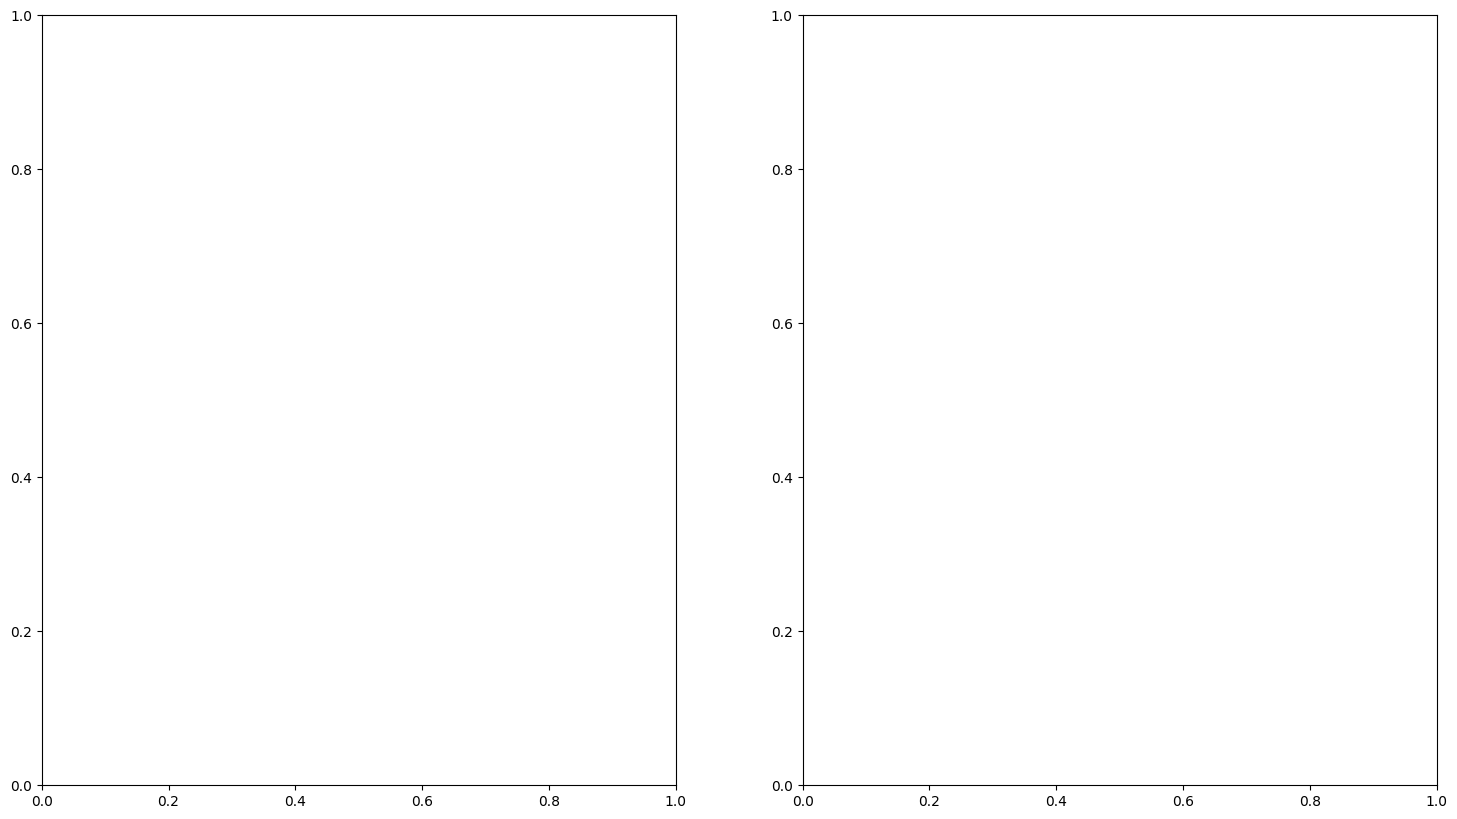

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(18, 10))


# idem for the singles
singles1 =  f['Singles1']

In [133]:
singles5 =  f['Singles5']
energy = singles5.arrays()['TotalEnergyDeposit']/0.001
energy = np.sort(energy)
numwindow = np.size(energy)
print(energy)
TotEnergy = sum(energy)
singles4 =  f['Singles4']
singles = singles4.arrays()['TotalEnergyDeposit']/0.001
singles3energy = sum(singles)
numwindowless = np.size(singles)

print(singles3energy/(len(singles)*511))
print(TotEnergy/(len(singles)*511))
print(numwindow/numwindowless)
print(numwindow)

[490, 490, 490, 490, 490, 490, 490, 490, ..., 532, 532, 532, 532, 532, 532, 532]
0.5907580597615354
0.2953574042795405
0.29560195011625995
1344651


In [134]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from numpy import exp, angle, abs
singles5 =  f['Singles5']
#position = singles5.arrays()['PostPosition']
position_x = singles5.arrays()['PostPosition_X']
position_y = singles5.arrays()['PostPosition_Y']
position_z = singles5.arrays()['PostPosition_Z']
position = np.stack((position_x, position_y, position_z), axis=-1)
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    phi = np.arctan2(hxy, z)
    theta = np.arctan2(y, x)
    return phi, theta, r
def sph2cart(phi, theta, r):
    x = r * np.cos(theta) * np.sin(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(phi)
    return x, y, z
phi, theta, r = cart2sph(position_x, position_y, position_z)
blurR = np.random.normal(r, 1)
blurTheta = np.random.normal(theta, 0.2378 / blurR)
blurPhi = np.random.normal(phi, 0.2378 / blurR)
#use 0.4247 for LYSO and 0.2378 for LXe
position_xx, position_yy, position_zz = sph2cart(blurPhi, blurTheta, blurR)
print(position_xx[0])
print(position_yy[0])
print(position_zz[0])
print(position_x[0])
print(position_y[0])
print(position_z[0])
#blurred = gaussian_filter(position, sigma = 0.2378 * mm)
#position_x = blurred[:,0]
#position_y = blurred[:,1]

14.945155881339035
-400.9282240070223
-5.918985112275102
14.424999999999908
-402.0
-6.0


In [135]:
# Continue from your existing code...
# You already have: f = uproot.open(filename)

# Get Singles5 and examine it
singles5 = f['Singles5']
print()
print(f'Singles5 tree:')
print(f'Number of events: {singles5.num_entries}')
print('Available branches:')
for b in singles5:
    print(f'  - {b.name}')

# Load Singles5 data
print('\n📥 Loading Singles5 data...')
data = singles5.arrays()

data = ak.with_field(data, position_xx, "PostPosition_X")
data = ak.with_field(data, position_yy, "PostPosition_Y")
data = ak.with_field(data, position_zz, "PostPosition_Z")
# data["PostPosition_X"] = position_xx
# data["PostPosition_Y"] = position_yy
# data["PostPosition_Z"] = position_zz

#take random sample
# N = 100000
#
# N = min(N, len(data))
# random_indicies = np.random.permutation(len(data))[:N]
# sample = data[random_indicies]
# data = sample

# Extract the key data we need
global_time = data["GlobalTime"]
# Position data is stored as separate X, Y, Z components
#
# x = position_xx
# y = position_yy
# z = position_zz
x = data["PostPosition_X"]
y = data["PostPosition_Y"]
z = data["PostPosition_Z"]

energy = data["TotalEnergyDeposit"]
volume_id = data["PreStepUniqueVolumeID"]

print(f'✅ Loaded {len(global_time):,} singles events')

# Convert to numpy arrays
import numpy as np
x = np.array(x)
y = np.array(y)
z = np.array(z)
# x = position_xx
# y = position_yy
# z = position_zz

print(f'\n📊 Data ranges:')
print(f'  Time: {np.min(global_time):.3f} to {np.max(global_time):.3f}')
print(f'  X: {np.min(x):.1f} to {np.max(x):.1f} mm')
print(f'  Y: {np.min(y):.1f} to {np.max(y):.1f} mm')
print(f'  Z: {np.min(z):.1f} to {np.max(z):.1f} mm')
print(f'  Energy: {np.min(energy):.1f} to {np.max(energy):.1f}')
print(f'  Unique detectors: {len(np.unique(volume_id))}')

# NOW with correct time window for nanoseconds!
print(f'🔄 Creating coincidences with proper time window...')

# Debug: Let's see what's happening with the timing
print("🔍 Debugging timing issues...")

# Check time differences between consecutive events
global_time_np = np.array(global_time)
sorted_times = np.sort(global_time_np)
time_diffs = np.diff(sorted_times)

print(f"Time difference statistics:")
print(f"  Minimum: {time_diffs.min():.6f} ns")
print(f"  Mean: {time_diffs.mean():.6f} ns")
print(f"  Median: {np.median(time_diffs):.6f} ns")
print(f"  Maximum: {time_diffs.max():.6f} ns")

# Count how many events are within different time windows
close_counts = []
windows = [0.1, 1.0, 4.5, 10.0, 50.0, 100.0]
for window in windows:
    count = np.sum(time_diffs <= window)
    close_counts.append(count)
    print(f"  Events within {window:5.1f} ns: {count}")
# Fixed coincidence algorithm - ignore the volume ID restriction
print(f'🔧 Fixed coincidence algorithm - using distance instead of volume ID...')

time_window = 4.5  # nanoseconds
global_time_np = np.array(global_time)
energy_np = np.array(energy)

# Sort by time for efficient search
time_order = np.argsort(global_time_np)
sorted_times = global_time_np[time_order]

coincidences = {
    'globalPosX1': [], 'globalPosY1': [], 'globalPosZ1': [],
    'globalPosX2': [], 'globalPosY2': [], 'globalPosZ2': [],
    'time1': [], 'time2': [],
    'energy1': [], 'energy2': [],
    'distance': []  # Add distance to filter close detectors
}

n_singles = len(sorted_times)
processed = set()

print(f'Searching {n_singles:,} singles for coincidences...')

for i in range(n_singles - 1):
    if i in processed:
        continue

    idx1 = time_order[i]
    time1 = sorted_times[i]

    # Look for partner within time window
    j = i + 1
    while j < n_singles and (sorted_times[j] - time1) <= time_window:
        if j in processed:
            j += 1
            continue

        idx2 = time_order[j]

        # Instead of volume ID, use POSITION to avoid same detector
        # Calculate distance between detection points
        dx = x[idx1] - x[idx2]
        dy = y[idx1] - y[idx2]
        dz = z[idx1] - z[idx2]
        distance = np.sqrt(dx**2 + dy**2 + dz**2)

        # Only accept if detectors are reasonably far apart (> 2cm)
        # This avoids same crystal or very adjacent crystals
        if distance > 20.0:  # 20mm minimum separation

            # Store coincidence
            coincidences['globalPosX1'].append(x[idx1])
            coincidences['globalPosY1'].append(y[idx1])
            coincidences['globalPosZ1'].append(z[idx1])

            coincidences['globalPosX2'].append(x[idx2])
            coincidences['globalPosY2'].append(y[idx2])
            coincidences['globalPosZ2'].append(z[idx2])

            coincidences['time1'].append(global_time_np[idx1])
            coincidences['time2'].append(global_time_np[idx2])

            coincidences['energy1'].append(energy_np[idx1])
            coincidences['energy2'].append(energy_np[idx2])

            coincidences['distance'].append(distance)

            processed.add(i)
            processed.add(j)
            break

        j += 1

# Convert to numpy arrays

for key in coincidences:
    coincidences[key] = np.array(coincidences[key])

n_coinc = len(coincidences['globalPosX1'])
print(f'\n✅ Created {n_coinc:,} coincidences from {n_singles:,} singles')
print(f'   Coincidence rate: {n_coinc/n_singles*100:.1f}%')
print(type(coincidences))

# N = 100000
# length = len(next(iter(coincidences.values())))
# N = min(N, length)
# random_indices = np.random.permutation(length)[:N]
# coincidences_temp = {key: value[random_indices] for key, value in coincidences.items()}
# # N = len(coincidences)
# #
# # N = min(N, len(coincidences))
# # random_indicies = np.random.permutation(len(coincidences))[:N]
# # coincidences = coincidences[random_indicies]
# #
# print(f'took a random sample of {N} coincidences')


Singles5 tree:
Number of events: 1344651.0
Available branches:
  - PostPosition_X
  - PostPosition_Y
  - PostPosition_Z
  - TotalEnergyDeposit
  - PreStepUniqueVolumeID
  - GlobalTime
  - LocalTime

📥 Loading Singles5 data...
✅ Loaded 1,344,651 singles events

📊 Data ranges:
  Time: 8392.531 to 19999966688.998
  X: -410.2 to 410.8 mm
  Y: -406.0 to 406.2 mm
  Z: -80.9 to 81.0 mm
  Energy: 0.5 to 0.5
  Unique detectors: 23040
🔄 Creating coincidences with proper time window...
🔍 Debugging timing issues...
Time difference statistics:
  Minimum: 0.000000 ns
  Mean: 14873.727956 ns
  Median: 9784.871702 ns
  Maximum: 219840.241051 ns
  Events within   0.1 ns: 94092
  Events within   1.0 ns: 122580
  Events within   4.5 ns: 122858
  Events within  10.0 ns: 123258
  Events within  50.0 ns: 126184
  Events within 100.0 ns: 129851
🔧 Fixed coincidence algorithm - using distance instead of volume ID...
Searching 1,344,651 singles for coincidences...

✅ Created 122,798 coincidences from 1,344,651

In [136]:
from scipy.spatial import cKDTree
import struct

x1_coords = np.array(coincidences['globalPosX1'])
y1_coords = np.array(coincidences['globalPosY1'])
z1_coords = np.array(coincidences['globalPosZ1'])
x2_coords = np.array(coincidences['globalPosX2'])
y2_coords = np.array(coincidences['globalPosY2'])
z2_coords = np.array(coincidences['globalPosZ2'])
energy1 = np.array(coincidences['energy1'])
energy2 = np.array(coincidences['energy2'])
time1 = np.array(coincidences['time1'])
time2 = np.array(coincidences['time2'])
distance = np.array(coincidences['distance'])
print(len(time1))

filename = 'PET_GRAB/costar_config/philips_vereos_virtual_crystals.lut'

# Load LUT file (assuming whitespace-separated values)
# Columns: crystal_id, x, y, z, ux, uy, uz
data = np.loadtxt(filename)

# Separate columns
crystal_ids = data[:, 0].astype(int)
positions = data[:, 1:4]    # x, y, z
directions = data[:, 4:7]   # ux, uy, uz
lut_lines = []
with open(filename, "r") as f:
    for line in f:
        if line.strip() == "" or line.startswith("#"):
            continue  # Skip empty or comment lines
        parts = list(map(float, line.strip().split()))
        crystal_id = int(parts[0])
        x, y, z = parts[1:4]
        ux, uy, uz = parts[4:7]
        lut_lines.append([crystal_id, x, y, z, ux, uy, uz])
# Build KDTree on positions
tree = cKDTree(positions)
def build_lut_arrays(lut_lines):
    positions = np.array([[x, y, z] for _, x, y, z, *_ in lut_lines])
    directions = np.array([[ux, uy, uz] for *_, ux, uy, uz in lut_lines])
    ids = np.array([crystal_id for crystal_id, *_ in lut_lines])
    return positions, directions, ids

positions, directions, ids = build_lut_arrays(lut_lines)
tree = cKDTree(positions)

def find_crystal_with_angle_filter(hit_pos, tree, positions, directions, ids,
                                   angle_threshold=-1, k=5):
    dists, indices = tree.query(hit_pos, k=k)
    best_id = None
    best_dist = float('inf')

    for idx in indices:
        c_pos = positions[idx]
        c_dir = directions[idx]
        vec = hit_pos - c_pos
        norm = np.linalg.norm(vec)
        if norm == 0:
            continue
        cos_theta = np.dot(c_dir, vec / norm)
        if cos_theta > angle_threshold and dists[indices.tolist().index(idx)] < best_dist:
            best_id = ids[idx]
            best_dist = dists[indices.tolist().index(idx)]

    return best_id

hits1 = np.vstack((x1_coords, y1_coords, z1_coords)).T
hits2 = np.vstack((x2_coords, y2_coords, z2_coords)).T

ids1 = [find_crystal_with_angle_filter(hit, tree, positions, directions, ids) for hit in hits1]
ids2 = [find_crystal_with_angle_filter(hit, tree, positions, directions, ids) for hit in hits2]
print(len(ids1))
print(ids1)
paired_ids = [(max(t1, t2)/1000, i1, i2#abs(t1 - t2)/1000, min(e1, e2)
                )
              for t1, t2, i1, i2, e1, e2 in zip(time1, time2, ids1, ids2, energy1, energy2)
              if i1 is not None and i2 is not None]

#time divided by 100 to fit in the max of <IIIff. Now in microseconds

print(os.getcwd())
indxtemp = 0
with open("PET_GRAB/coincidences.cdf", "wb") as f:
    for t, i1, i2 in paired_ids:
        # Pack: uint32, uint32, uint32, float32, float32
        f.write(struct.pack("<III", indxtemp, int(i1), int(i2)))
        #float(tof)
            #float(energy)
        indxtemp = indxtemp + 1
    

122798
122798
[2001389, 481432, 1300231, 2549992, 1148075, 576711, 216554, 570951, 3655190, 1118031, 3279511, 665311, 943594, 1680113, 849909, 2039713, 2548992, 225349, 2283709, 768793, 3003873, 3404430, 1953591, 1512072, 479032, 1018630, 2282592, 2041355, 1841354, 3195593, 2814994, 861116, 755070, 3273711, 2392274, 198513, 278271, 3570074, 675790, 2925230, 1791710, 2127831, 2914313, 1298069, 2999912, 2658714, 2731190, 2832033, 3274350, 3285071, 3556071, 404911, 3117111, 3403554, 1955031, 25871, 2569673, 281711, 3381630, 3104116, 481430, 1694951, 2754310, 1859475, 2833312, 1753750, 2104470, 678231, 2021592, 2567789, 1830510, 3004315, 461631, 111073, 598989, 1209275, 2088392, 2383468, 1695915, 2269594, 2475630, 3366671, 3186910, 1392509, 2189674, 3366069, 929511, 649592, 3377432, 1826115, 2360230, 2725314, 3118430, 859353, 967430, 1038670, 192629, 2670111, 1144994, 2159830, 289872, 1300031, 1133868, 3192150, 2289395, 127152, 295834, 671352, 1385068, 2354353, 2646751, 393153, 739390, 321